EDA
---

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')



data_path = './data/'

In [2]:
data_files = os.listdir(data_path)
data_files[:5]

['ISS.OEM_J2K_EPH-1-03.xml',
 'ISS.OEM_J2K_EPH-1-31.xml',
 'ISS.OEM_J2K_EPH-10-16-21.xml',
 'ISS.OEM_J2K_EPH-10-28.xml',
 'ISS.OEM_J2K_EPH-10-4-21.xml']

In [3]:
#concatenates all the data in a folder into a single dataframe.
def merge_data(data_folder_path, xpath = './/stateVector'):
    dfs = []
    data_files = os.listdir(data_folder_path)
    for file in data_files:
        dfs.append(pd.read_xml(data_folder_path + file, xpath = xpath))
    new_df = pd.concat(dfs)
    return new_df

In [4]:
df = merge_data(data_path)

In [5]:
#change EPOCH to datetime
date_format = '%Y-%jT%H:%M:%S.%fZ'
df['EPOCH'] = pd.to_datetime(df['EPOCH'], format = date_format)

In [6]:
earliest = df['EPOCH'].min()
latest = df['EPOCH'].max()
earliest, latest

(Timestamp('2021-08-13 12:40:19.983000'), Timestamp('2022-03-05 12:00:00'))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125723 entries, 0 to 5665
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   EPOCH   125723 non-null  datetime64[ns]
 1   X       125723 non-null  float64       
 2   Y       125723 non-null  float64       
 3   Z       125723 non-null  float64       
 4   X_DOT   125723 non-null  float64       
 5   Y_DOT   125723 non-null  float64       
 6   Z_DOT   125723 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.7 MB


In [8]:
df.drop_duplicates(subset = 'EPOCH', keep = 'first', ignore_index = True, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92534 entries, 0 to 92533
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EPOCH   92534 non-null  datetime64[ns]
 1   X       92534 non-null  float64       
 2   Y       92534 non-null  float64       
 3   Z       92534 non-null  float64       
 4   X_DOT   92534 non-null  float64       
 5   Y_DOT   92534 non-null  float64       
 6   Z_DOT   92534 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 4.9 MB


In [10]:
#about 19 observations an hour
60*60*len(df)/(df['EPOCH'].max()-df['EPOCH'].min()).total_seconds()

18.902513603030624

In [11]:
df.head()

EPOCH            X            Y            Z     X_DOT  \
0 2022-01-03 12:00:00 -1325.896392  5492.890956  3762.423748 -4.874701   
1 2022-01-03 12:04:00 -2433.281488  4320.159983  4635.900477 -4.297149   
2 2022-01-03 12:08:00 -3363.479005  2832.811037  5170.828406 -3.407241   
3 2022-01-03 12:12:00 -4048.928392  1139.313496  5328.425368 -2.270061   
4 2022-01-03 12:16:00 -4439.907075  -637.051221  5097.390987 -0.968255   

      Y_DOT     Z_DOT  
0 -4.102517  4.264288  
1 -5.610270  2.970223  
2 -6.708421  1.460389  
3 -7.317825 -0.154980  
4 -7.394847 -1.758465

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92534 entries, 0 to 92533
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   EPOCH   92534 non-null  datetime64[ns]
 1   X       92534 non-null  float64       
 2   Y       92534 non-null  float64       
 3   Z       92534 non-null  float64       
 4   X_DOT   92534 non-null  float64       
 5   Y_DOT   92534 non-null  float64       
 6   Z_DOT   92534 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 4.9 MB


In [13]:
# x,y,z appear to be positions in kilometers (earth is ~6400 km radius)
# dot values are speeds in km/s (LEO is about 7.8 km/s)
df.describe()

X             Y             Z         X_DOT         Y_DOT  \
count  92534.000000  92534.000000  92534.000000  92534.000000  92534.000000   
mean     -31.558702      6.848571    -22.654319     -0.000270     -0.034269   
std     4111.560991   3875.544212   3778.441607      4.635894      4.384629   
min    -6801.159311  -6799.330442  -5343.884465     -7.664345     -7.662875   
25%    -3933.343368  -3664.790502  -3811.385161     -4.395021     -4.170115   
50%      -62.387203     17.643498    -39.273033     -0.001008     -0.054648   
75%     3864.075008   3677.501794   3767.886391      4.380774      4.115346   
max     6800.050248   6800.363972   5331.742825      7.664973      7.668339   

              Z_DOT  
count  92534.000000  
mean       0.015980  
std        4.234415  
min       -6.019382  
25%       -4.213618  
50%        0.044746  
75%        4.227915  
max        6.022769

### speed

In [14]:
df['speed'] = df.apply(lambda row: np.linalg.norm([row['X_DOT'],row['Y_DOT'],row['Z_DOT']]), axis = 1)

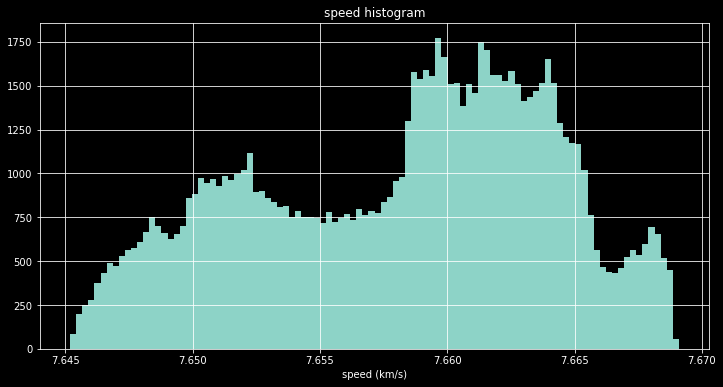

In [15]:
df['speed'].hist(bins = 100, figsize = (12,6))
plt.xlabel("speed (km/s)")
plt.title('speed histogram');

### distance from earth center

In [16]:
df.columns

Index(['EPOCH', 'X', 'Y', 'Z', 'X_DOT', 'Y_DOT', 'Z_DOT', 'speed'], dtype='object')

In [17]:
df['radius'] = df.apply(lambda row: np.linalg.norm([row['X'],row['Y'],row['Z']]), axis = 1)

#outward radial vector
df['radial'] = df.apply(lambda row: np.array([row['X'], row['Y'], row['Z']])/row['radius'], axis = 1)

In [18]:
df['radial'].iloc[0]

array([-0.19531094,  0.80912935,  0.55422318])

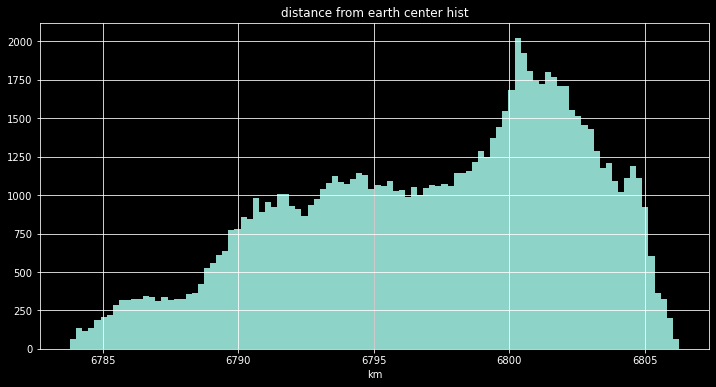

In [19]:
df.radius.hist(bins = 100, figsize = (12,6))
plt.title('distance from earth center hist')
plt.xlabel("km");

<AxesSubplot:xlabel='X', ylabel='Z'>

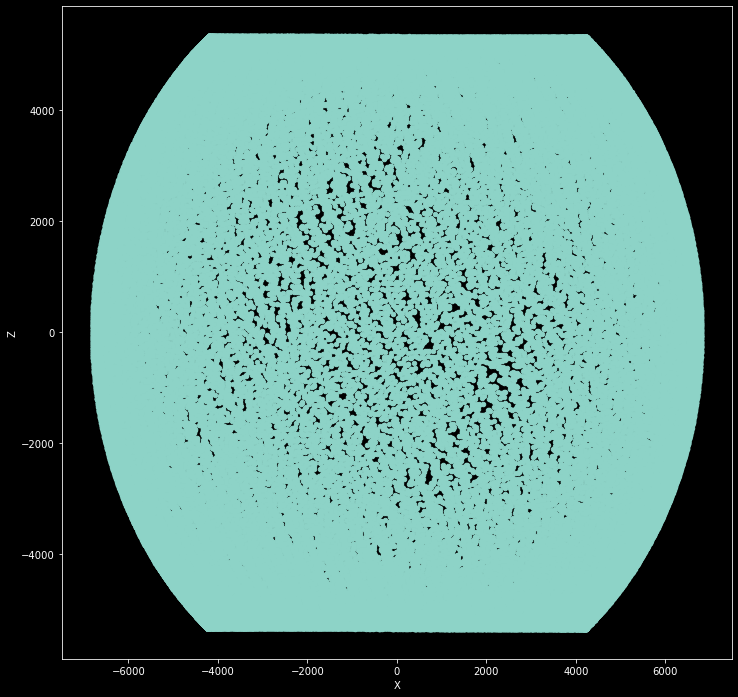

In [20]:
df.plot.scatter('X', "Z", figsize = (12,12), )

<AxesSubplot:xlabel='X_DOT', ylabel='Z_DOT'>

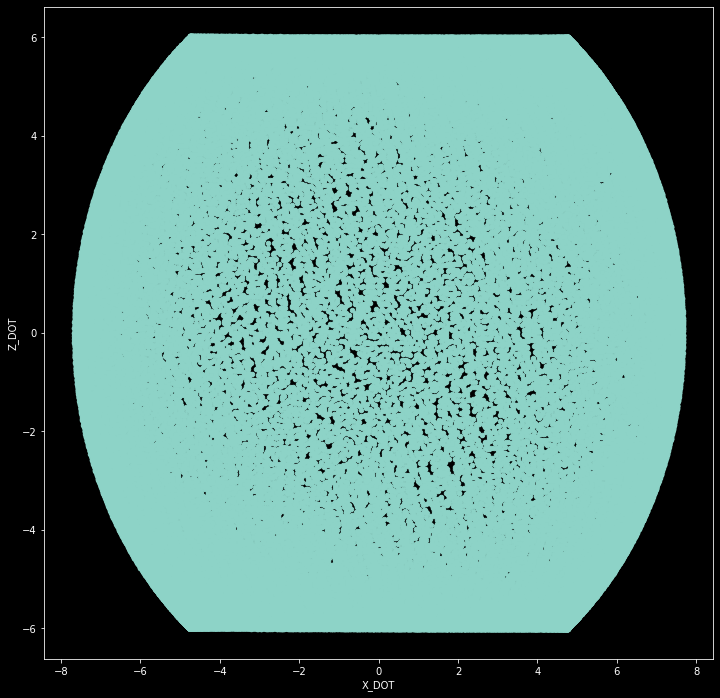

In [21]:
df.plot.scatter('X_DOT', "Z_DOT", figsize = (12,12), )

In [22]:
# convert to angles, latlon
df['azi'] = df.apply(lambda row: np.arctan(row['Y']/row['X']), axis = 1)
df['pol'] = df.apply(lambda row: np.arctan(row['Z']/6400), axis = 1)

Text(0.5, 1.0, 'longitude hist')

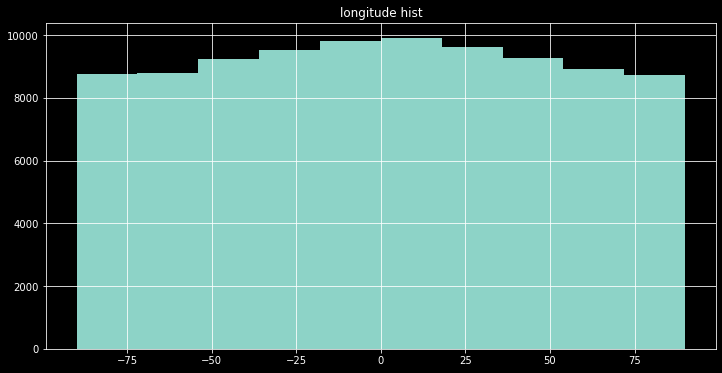

In [23]:
df['lon'] = df['azi']*180/np.pi
df['lon'].hist(figsize = (12,6))
plt.title("longitude hist")

Text(0.5, 1.0, 'latitude hist')

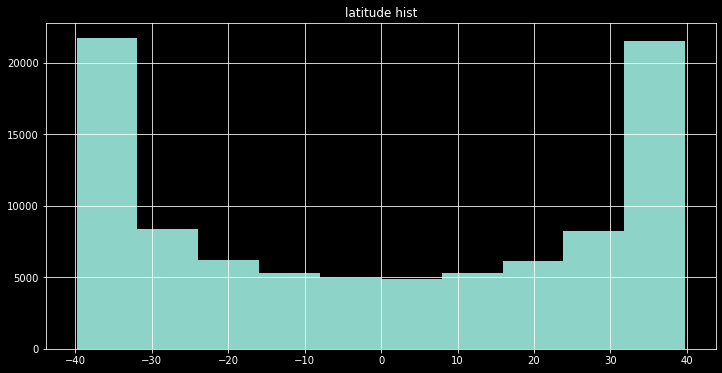

In [24]:
df['lat'] = df['pol']*180/np.pi
df['lat'].hist(figsize = (12,6))
plt.title("latitude hist")

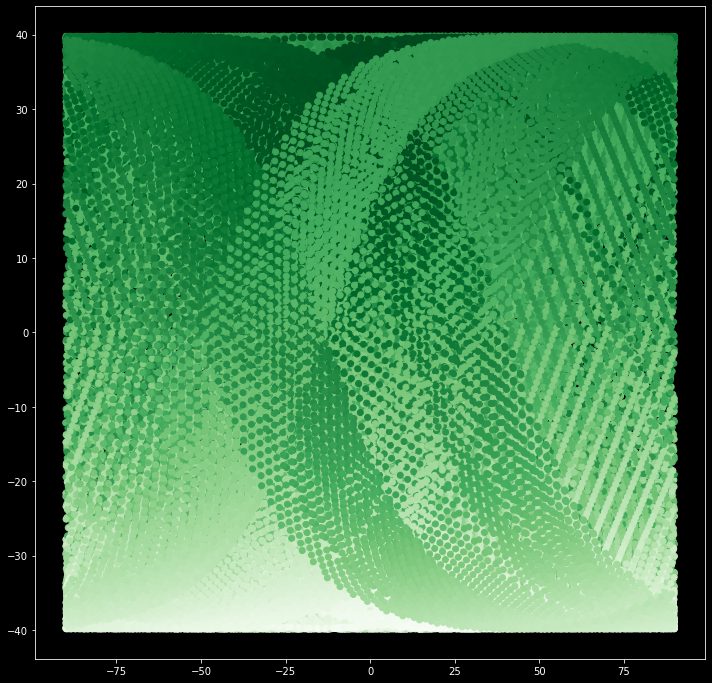

In [25]:
#plot speed(color) with latlon
plt.figure(figsize = (12,12))
plt.scatter(df['lon'], df['lat'], c = df['speed'], cmap = "Greens")

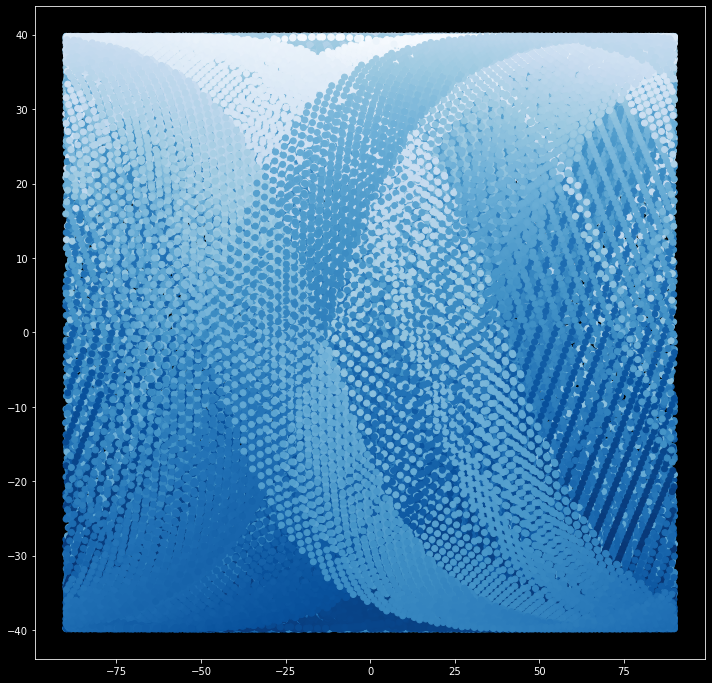

In [26]:
#plot orbital distance from center (color) with latlon
plt.figure(figsize = (12,12))
plt.scatter(df['lon'], df['lat'], c = df['radius'], cmap = "Blues")

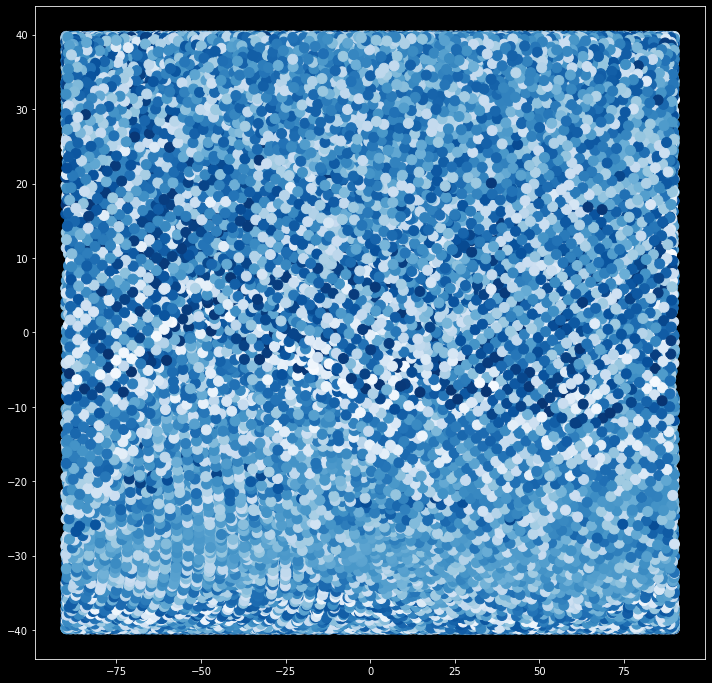

In [27]:
#plot speed (color) with lat/lon (averaged)
plt.figure(figsize = (12,12))
plt.scatter(df.groupby(by = ['speed']).mean()['lon'],df.groupby(by = ['speed']).mean()['lat'], c = df['speed'], cmap = "Blues", marker='o', s = 100)

In [28]:
#can we perform a diff to get acceleration?

In [29]:
df['speed_diffs'] = df['speed'].diff()

Text(0.5, 1.0, 'speed diff()')

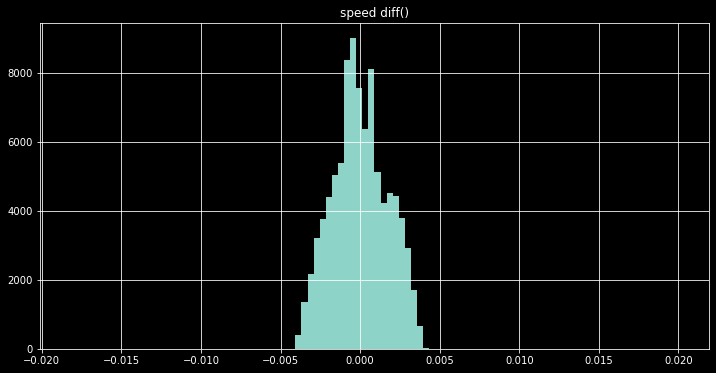

In [30]:
#speed diffs
df['speed_diffs'].hist(bins = 100, figsize = (12,6))
plt.title("speed diff()")

The data are approximately evenly spaced, but there is an orbit there the station was tracked very precisely (look at -50 lon, -30 lat). This is likely what's causing the spike at 0. I'd be interested if the biggest spike at around 0.001 was from station keeping events.

<AxesSubplot:title={'center':'speed diffs (1H resample)'}, xlabel='EPOCH'>

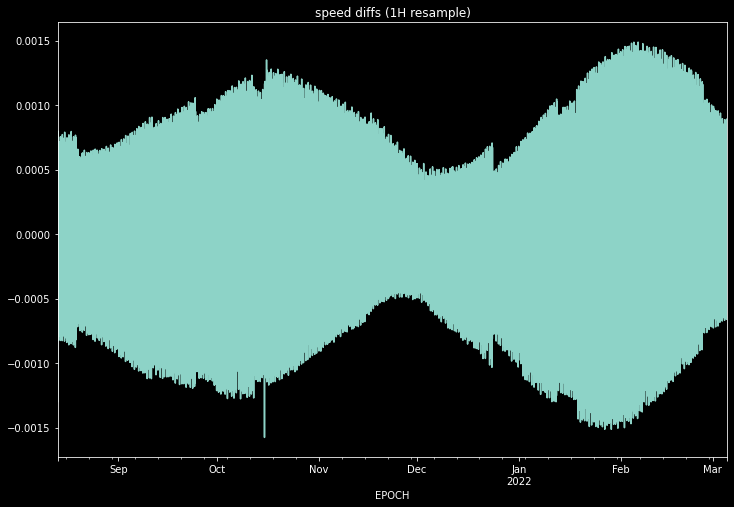

In [31]:
df.resample(rule = '1H', on = 'EPOCH').mean()['speed_diffs'].plot(figsize = (12,8), title = "speed diffs (1H resample)")

<AxesSubplot:title={'center':'speeds (1 H resample)'}, xlabel='EPOCH'>

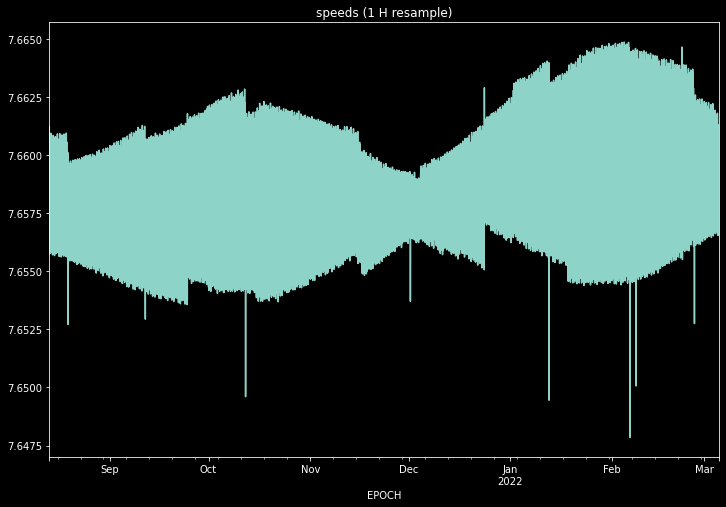

In [32]:
df.resample(rule = "1H", on = 'EPOCH').mean()['speed'].plot(figsize = (12,8), title = "speeds (1 H resample)")

In [33]:
df['time_diffs'] = df['EPOCH'].diff().apply(lambda time: time.total_seconds())

Text(0.5, 0, 'seconds')

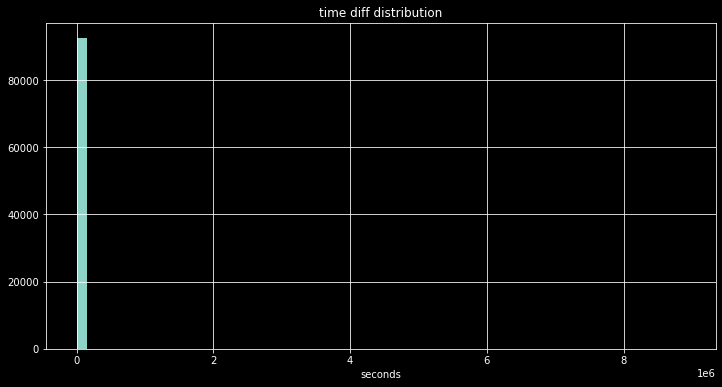

In [34]:
df[df['time_diffs']>-10]['time_diffs'].dropna().hist(bins = 60, figsize=(12,6))
plt.title('time diff distribution')
plt.xlabel("seconds")

These are mostly 2 minutes apart. There are a few at 0, and at least one very large negative value. This 0 number could also be contributing to the 0 speed diffs.

In [35]:
1000*0.001/240 # 1000 m/km * 0.001 speed diff peak / 240 seconds per diff

0.004166666666666667

Could this be station-keeping? What acceleration do the thrusters give? We could look this up by looking up the station keeping events.

Acceleration should be made more rigorously. It could also be given as a vector (XYZ or, radially, which would cover gravity)

accelerations to account for:

- station-keeping events
- rendezvous and docking events
- atmospheric drag (data comments include info on this)
- change in acceleration due to gravity based on radius

In [36]:
df

EPOCH            X            Y            Z     X_DOT  \
0     2022-01-03 12:00:00 -1325.896392  5492.890956  3762.423748 -4.874701   
1     2022-01-03 12:04:00 -2433.281488  4320.159983  4635.900477 -4.297149   
2     2022-01-03 12:08:00 -3363.479005  2832.811037  5170.828406 -3.407241   
3     2022-01-03 12:12:00 -4048.928392  1139.313496  5328.425368 -2.270061   
4     2022-01-03 12:16:00 -4439.907075  -637.051221  5097.390987 -0.968255   
...                   ...          ...          ...          ...       ...   
92529 2022-03-05 11:44:00 -1617.172634  5811.915098 -3138.747925 -5.825532   
92530 2022-03-05 11:48:00 -2939.654841  5839.158105 -1871.522606 -5.127851   
92531 2022-03-05 11:52:00 -4048.592064  5442.251213  -467.971380 -4.056746   
92532 2022-03-05 11:56:00 -4863.172342  4649.677332   969.689743 -2.689878   
92533 2022-03-05 12:00:00 -5324.017021  3518.907107  2336.610218 -1.127040   

          Y_DOT     Z_DOT     speed       radius  \
0     -4.102517  4.264288  7.666649  6788.643808   
1     -5.610270  2.970223  7.665693  6787.946252   
2     -6.708421  1.460389  7.664524  6787.877120   
3     -7.317825 -0.154980  7.663404  6788.517752   
4     -7.394847 -1.758465  7.662472  6789.845651   
...         ...       ...       ...          ...   
92529  1.004555  4.863254  7.654880  6800.392855   
92530 -0.779273  5.632571  7.656891  6799.995207   
92531 -2.508369  5.992176  7.658674  6799.131796   
92532 -4.056206  5.914975  7.659972  6797.811613   
92533 -5.309342  5.406270  7.660750  6796.146833   

                                                  radial       azi       pol  \
0      [-0.1953109382702518, 0.8091293506095505, 0.55... -1.333943  0.531459   
1      [-0.35847094212161773, 0.6364458148637584, 0.6... -1.057846  0.626888   
2      [-0.49551265380534976, 0.41733387145586914, 0.... -0.699964  0.679565   
3      [-0.5964377704113173, 0.1678294935498495, 0.78... -0.274294  0.694286   
4      [-0.6539039770557674, -0.09382410939481002, 0....  0.142510  0.672583   
...                                                  ...       ...       ...   
92529  [-0.23780576625222621, 0.8546440216978655, -0.... -1.299410 -0.455962   
92530  [-0.4323024871740925, 0.8587003265093851, -0.2... -1.104402 -0.284493   
92531  [-0.5954572120702715, 0.8004332577420213, -0.0... -0.931199 -0.072991   
92532  [-0.7154026353310343, 0.683996203052948, 0.142... -0.762959  0.150370   
92533  [-0.7833875800344499, 0.5177797350490648, 0.34... -0.584034  0.350059   

             lon        lat  speed_diffs  time_diffs  
0     -76.429308  30.450364          NaN         NaN  
1     -60.610103  35.918048    -0.000957       240.0  
2     -40.104970  38.936198    -0.001169       240.0  
3     -15.715881  39.779630    -0.001121       240.0  
4       8.165241  38.536177    -0.000932       240.0  
...          ...        ...          ...         ...  
92529 -74.450707 -26.124688     0.001831       240.0  
92530 -63.277573 -16.300261     0.002010       240.0  
92531 -53.353754  -4.182055     0.001783       240.0  
92532 -43.714338   8.615585     0.001299       240.0  
92533 -33.462695  20.056903     0.000778       240.0  

[92534 rows x 16 columns]

<AxesSubplot:>

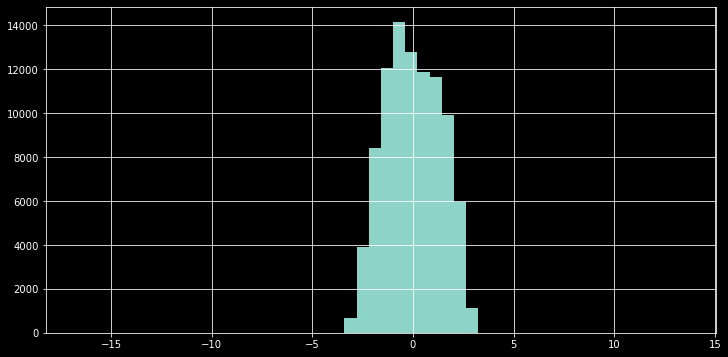

In [37]:
df['rad_diffs'] = df['radius'].diff()
df['rad_diffs'].hist(bins = 50,figsize = (12,6))

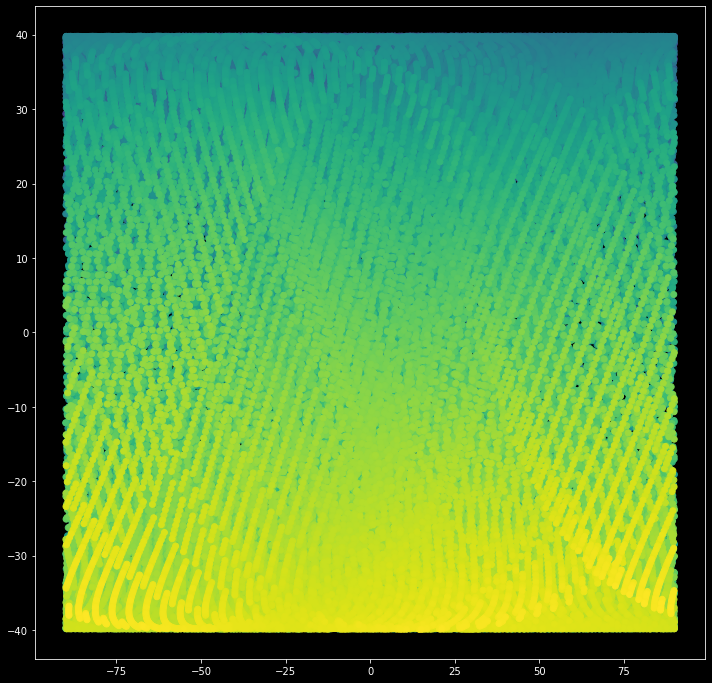

In [38]:
dfrad = df.groupby(by = 'radius').mean()
plt.figure(figsize = (12,12))
plt.scatter(dfrad['lon'], dfrad['lat'], c = dfrad.index)

### Rounding

In [39]:
df['lat_round'] = df['lat'].apply(lambda this_lat: round(this_lat, 0))
df['lon_round'] = df['lon'].apply(lambda this_lon: round(this_lon, 0))

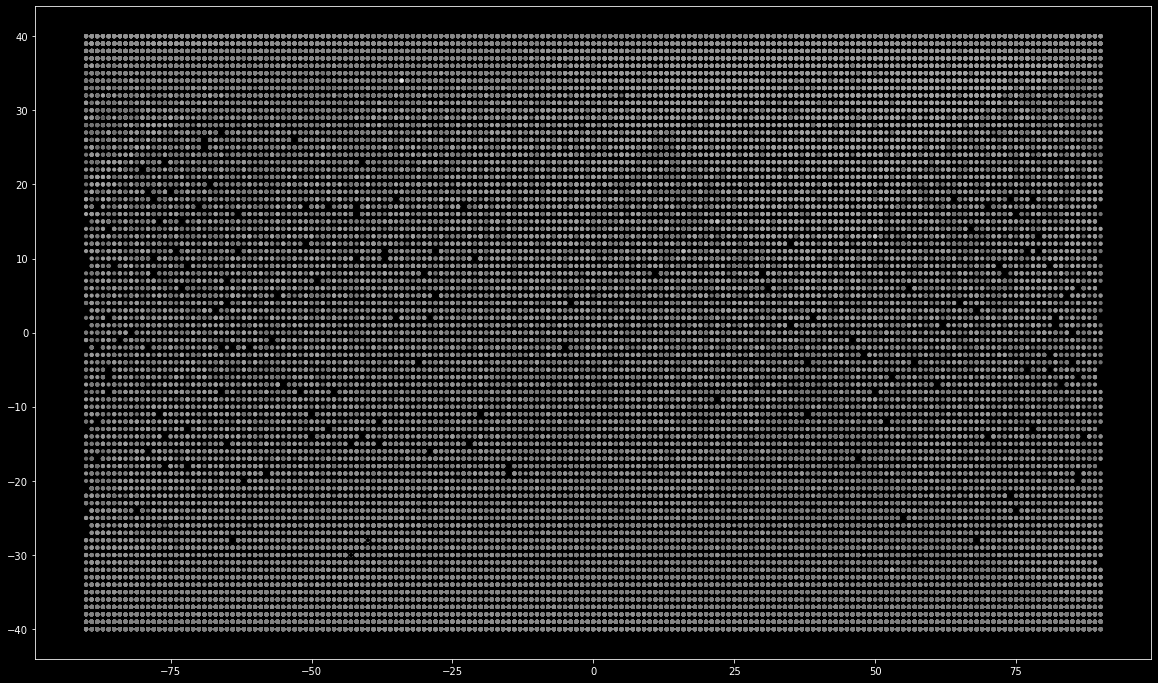

In [40]:
plt.figure(figsize = (20,12))
plt.scatter(df['lon_round'], df['lat_round'], c = df['rad_diffs'], cmap = 'Greys', s = 10)

The coordinates are in EME2000 / J2000 / ICRF, which are fixed on the celestial plane.

[ICRF / EME2000](https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/Tutorials/pdf/individual_docs/04_concepts.pdf)

[Celestial Reference Frame](https://ggos.org/item/celestial-reference-frame/)

The ICRF has x on the intersection of the ecliptic and earth mean equatorial plane and z perpendicular to the mean equatorial plane. (and so y also on the plane).

This means that these locations aren't exactly latitude and longitude. Latitude will shift slightly as the Earth wobbles. More importantly, the longitudes will be scattered around their entire range depending on the current point of rotation of the Earth.

Using the time of day may not be good enough, as the Earth experiences a leap year every 4 years, shifting the rotation relative to the time of day. (Does this actually affect it, though?) It might be best to track the rotation of Earth's longitude by Epoch time, as in, number of seconds.

Just adjusting by the length of a day might not be good enough either. If the period used here is a little different than that period of rotation, it will smear the result over the year. The width of that smear will depend on how far the used value is from the true value.


### true day length
The length of a day on the surface of the earth, relative to the sun, [is almost exactly 24 hours](https://www.timeanddate.com/time/earth-rotation.html). This is a bit longer, [by three minutes fifty-six seconds](https://en.wikipedia.org/wiki/Earth%27s_rotation), for the Earth to make a complete rotation. It has to rotate this extra time to account for the motion along its orbit. These extra minutes should be about 1/365 of a day:

In [41]:
'{:.2f}'.format(86400/(60*3 + 56.715))   # num seconds in a day over number seconds in this extra time.

'365.00'

I rounded 56 seconds to 56.7 to make it look nice. Don't get all persnickety about it, please.

In [42]:
#getting total seconds since beginning
df['seconds'] = df['EPOCH'].apply(lambda this_timedelta: (this_timedelta-earliest).total_seconds())
df['seconds'].head()

0    1.235278e+07
1    1.235302e+07
2    1.235326e+07
3    1.235350e+07
4    1.235374e+07
Name: seconds, dtype: float64

In [43]:
#reorder by seconds elapsed
df.sort_values(by='seconds', inplace = True)
df.head()

EPOCH            X            Y            Z  \
51851 2021-08-13 12:40:19.983 -4188.917052  1060.451826  5240.374217   
51852 2021-08-13 12:44:19.983 -4780.617186  -614.185177  4786.777189   
51853 2021-08-13 12:48:19.983 -5025.016503 -2244.186176  3984.441448   
51854 2021-08-13 12:52:19.983 -4904.188295 -3711.056159  2891.689879   
51855 2021-08-13 12:56:19.983 -4426.768983 -4908.074484  1588.091105   

          X_DOT     Y_DOT     Z_DOT     speed       radius  \
51851 -3.137317 -6.900952 -1.108280  7.661213  6792.135605   
51852 -1.763380 -6.969268 -2.648663  7.661307  6792.993447   
51853 -0.260732 -6.531178 -3.996676  7.661441  6794.331174   
51854  1.261602 -5.618073 -5.053926  7.661367  6795.945189   
51855  2.692637 -4.296159 -5.742906  7.660826  6797.610766   

                                                  radial       azi       pol  \
51851  [-0.6167304800065618, 0.1561293660280421, 0.77... -0.247947  0.686105   
51852  [-0.7037570731890268, -0.09041451043013586, 0....  0.127774  0.642178   
51853  [-0.7395895746805686, -0.3303027360509655, 0.5...  0.420025  0.556849   
51854  [-0.7216344686368937, -0.546069171550445, 0.42...  0.647783  0.424372   
51855  [-0.6512242515282974, -0.7220293501238437, 0.2...  0.836913  0.243227   

             lon        lat  speed_diffs    time_diffs  rad_diffs  lat_round  \
51851 -14.206335  39.310907    -0.006104 -1.278112e+07   1.613416       39.0   
51852   7.320917  36.794061     0.000094  2.400000e+02   0.857842       37.0   
51853  24.065670  31.905112     0.000134  2.400000e+02   1.337727       32.0   
51854  37.115215  24.314716    -0.000074  2.400000e+02   1.614015       24.0   
51855  47.951563  13.935857    -0.000542  2.400000e+02   1.665577       14.0   

       lon_round  seconds  
51851      -14.0      0.0  
51852        7.0    240.0  
51853       24.0    480.0  
51854       37.0    720.0  
51855       48.0    960.0

In [125]:
# get the number of seconds modulo a day of rotation (23 hours, 56 minutes, 4 seconds)

seconds_1_rotation = ((23*60+56)*60+4)
seconds_1_rotation_plus = ((23*60+56)*60+5)
seconds_1_rotation_minus = ((23*60+56)*60+3)

df['sec_mod_rot'] = df['seconds']%seconds_1_rotation
df['sec_mod_rot_plus'] = df['seconds']%seconds_1_rotation_plus
df['sec_mod_rot_minus'] = df['seconds']%seconds_1_rotation_minus

<AxesSubplot:>

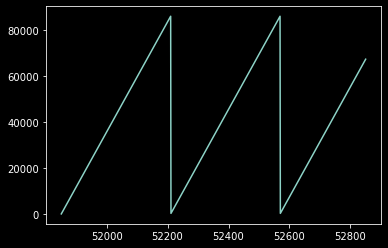

In [45]:
#check that it worked
df['sec_mod_rot'].iloc[:1000].plot()

In [46]:
df['sec_mod_rot'].max(), df['sec_mod_rot'].min()

(86162.80099999905, 0.0)

<AxesSubplot:>

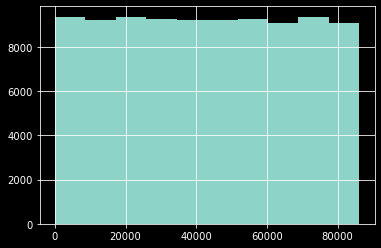

In [47]:
df['sec_mod_rot'].hist()

In [48]:
(df['sec_mod_rot'].diff() > -100) & (df['sec_mod_rot'].diff() < 500)


51851    False
51852     True
51853     True
51854     True
51855     True
         ...  
92529     True
92530     True
92531     True
92532     True
92533     True
Name: sec_mod_rot, Length: 92534, dtype: bool

In [49]:
# make a column to just get the sec_mod_rots in the typical range
df['sec_diff'] = df['seconds'].diff()
df['sec_diff_is_mid'] = (df['seconds'].diff() > -100) & (df['seconds'].diff() < 500)

In [50]:
df.loc[df['sec_diff_is_mid'],'sec_diff'].describe()

count    92533.000000
mean       190.452920
std         75.537183
min          0.185000
25%        150.000000
50%        240.000000
75%        240.000000
max        240.000000
Name: sec_diff, dtype: float64

In [126]:
#convert this to an angle of earth rotation
df['earth_phase'] = np.pi*2*df['sec_mod_rot']/seconds_1_rotation
df['earth_phase_plus'] = np.pi*2*df['sec_mod_rot']/seconds_1_rotation_plus
df['earth_phase_minus'] = np.pi*2*df['sec_mod_rot']/seconds_1_rotation_minus

<AxesSubplot:>

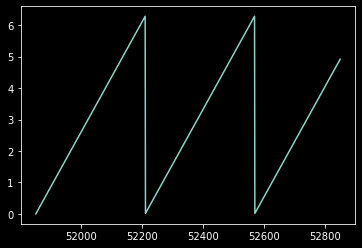

In [52]:
#plot earth phases. to make sure it looks good
df.iloc[:1000].earth_phase.plot()

In [128]:
#make earth-fixed x and y coordinates. X and Y have to rotate counterclockwise, along with the earth.
df['X_earth'] = df.apply(lambda row: row['X']*np.cos(row['earth_phase']) - row['Y']*np.sin(row['earth_phase']) , axis = 1)
df['Y_earth'] = df.apply(lambda row: row['X']*np.sin(row['earth_phase']) + row['Y']*np.cos(row['earth_phase']) , axis = 1)

df['X_earth_p'] = df.apply(lambda row: row['X']*np.cos(row['earth_phase_plus']) - row['Y']*np.sin(row['earth_phase_plus']) , axis = 1)
df['Y_earth_p'] = df.apply(lambda row: row['X']*np.sin(row['earth_phase_plus']) + row['Y']*np.cos(row['earth_phase_plus']) , axis = 1)

df['X_earth_m'] = df.apply(lambda row: row['X']*np.cos(row['earth_phase_minus']) - row['Y']*np.sin(row['earth_phase_minus']) , axis = 1)
df['Y_earth_m'] = df.apply(lambda row: row['X']*np.sin(row['earth_phase_minus']) + row['Y']*np.cos(row['earth_phase_minus']) , axis = 1)

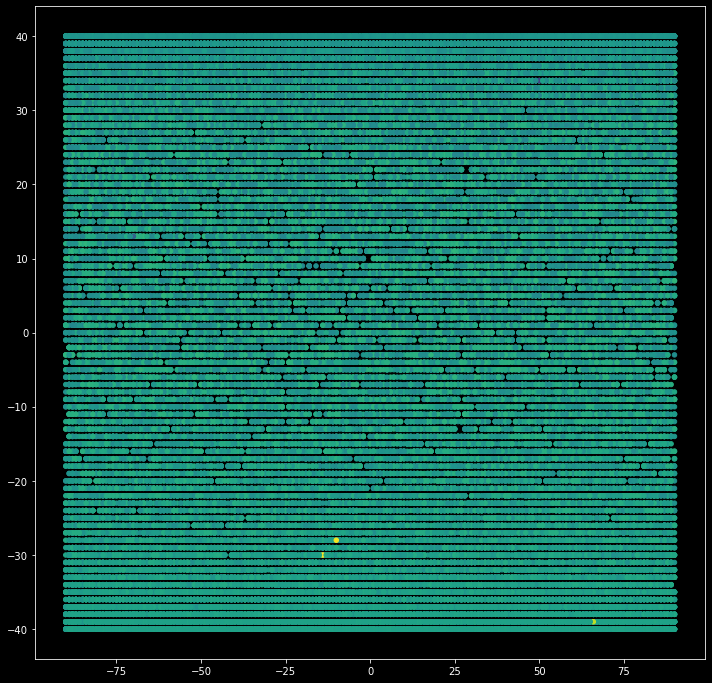

In [131]:
# convert to azi
df['azi_earth'] = df.apply(lambda row: np.arctan(row['Y_earth_m']/row['X_earth_m']), axis = 1)
df['lon_earth'] = df['azi_earth']*180/np.pi
df['lon_earth_round'] = df['lon_earth'].apply(lambda this_lon: round(this_lon, 0))


plt.figure(figsize = (12,12))
plt.scatter(df['lon_earth_round'], df['lat_round'], c = df['rad_diffs'], s = 20)

In [122]:
k = 0.01 #speed diff cutoff
df['speed_diff_small'] = df['speed_diffs'].apply(lambda this_speed_diff: -k < this_speed_diff < k)
df_small_speeds = df[df['speed_diff_small']]

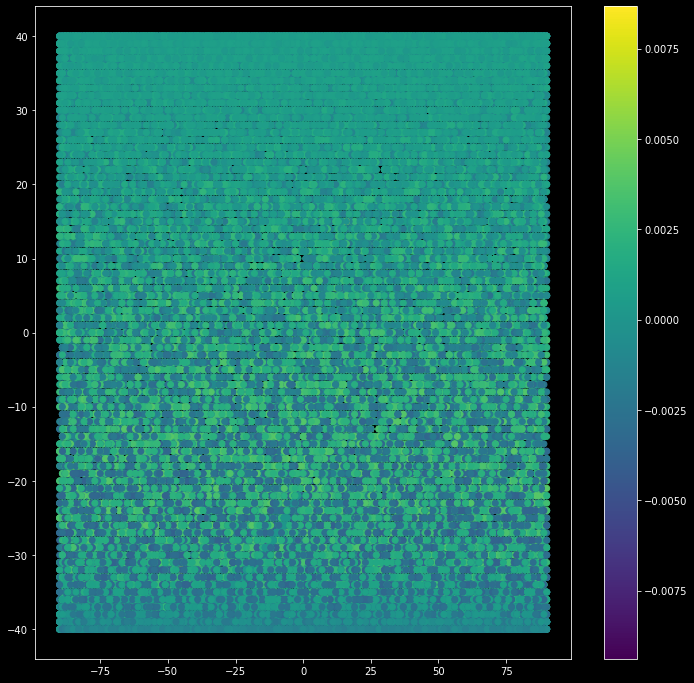

In [124]:


plt.figure(figsize = (12,12))
plt.scatter(df_small_speeds['lon_earth_round'], df_small_speeds['lat_round'], c = df_small_speeds['speed_diffs'])
plt.colorbar()

### rounding unrotated (uncorrected) lat/lon

In [63]:
df_rounded = df.groupby(by = ['lon_round', 'lat_round']).mean()
df_rounded['lat'] = df_rounded.index.to_frame()['lat_round']
df_rounded['lon'] = df_rounded.index.to_frame()['lon_round']

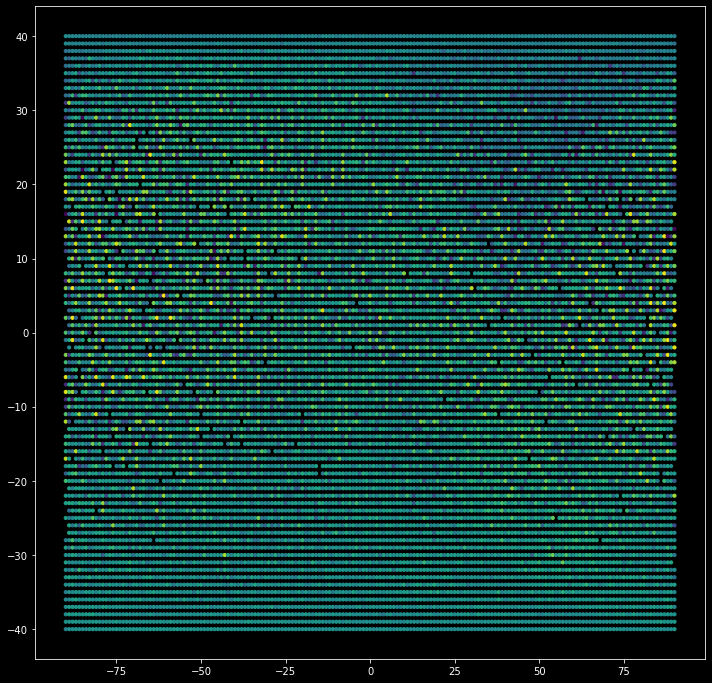

In [64]:
#plot rad_differences with earth centered lat and lon
plt.figure(figsize = (12,12))
plt.scatter(df_rounded['lon'], df_rounded['lat'], c = df_rounded['rad_diffs'], s = 10)

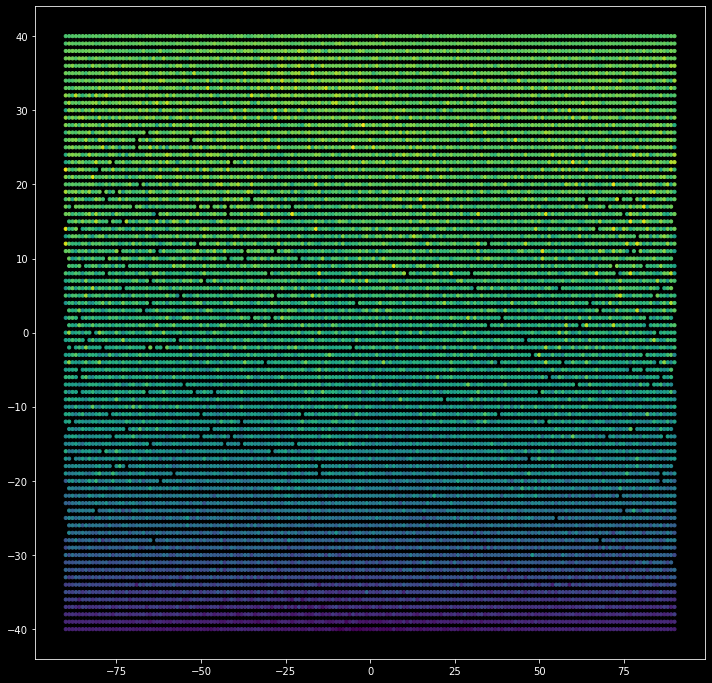

In [65]:
#plot speed with earth centered lat and lon
plt.figure(figsize = (12,12))
plt.scatter(df_rounded['lon'], df_rounded['lat'], c = df_rounded['speed'], s = 10)

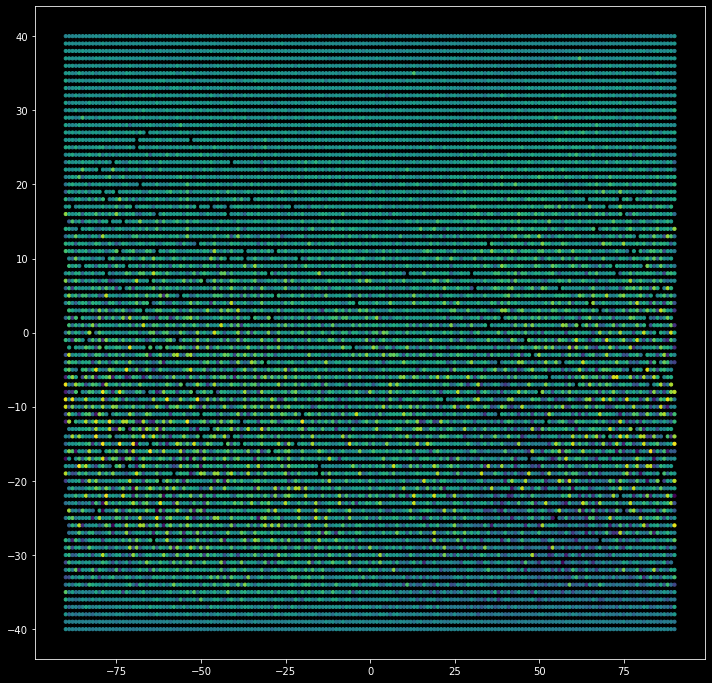

In [66]:
#plot speed_differences with earth centered lat and lon
plt.figure(figsize = (12,12))
plt.scatter(df_rounded['lon'], df_rounded['lat'], c = df_rounded['speed_diffs'], s = 10)

In [67]:
df.columns

Index(['EPOCH', 'X', 'Y', 'Z', 'X_DOT', 'Y_DOT', 'Z_DOT', 'speed', 'radius',
       'radial', 'azi', 'pol', 'lon', 'lat', 'speed_diffs', 'time_diffs',
       'rad_diffs', 'lat_round', 'lon_round', 'seconds', 'sec_mod_rot',
       'sec_diff', 'sec_diff_is_mid', 'earth_phase', 'X_earth', 'Y_earth',
       'azi_earth', 'lon_earth'],
      dtype='object')

# Compare gravity

In [135]:
#define some gravitational thigns
G = 6.67*10**-11
x_to_moon = 400_000_000
m_moon = 7.35*10**22
m_earth = 5.972*10**24

In [133]:
#calculate gravitational acceleration by the moon on an object at earth distance
G*m_moon/(x_to_moon**2)

3.0640312499999996e-05